<a href="https://colab.research.google.com/github/kingsgameBen/MLbasic_0223/blob/main/ML0225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 人類的智慧： 邏輯 ＋ 經驗<--AI人工智慧


ＡＩ  - 資料科學：  *First of thing -> 1.「 資料 」的準備 2.演算法 3.模型
    * 演算法->統計資料(訓練：驗證 8:2)-> 訓練出模型(80%-90%) -> 驗證模型(20%-10%)
1. -[x] 機器學習（傳統統計）--> 表格

2. -[x] 深度學習： 抽象問題, 模仿人類神經 (體驗、美醜[容貌、氣質、穿搭...]、圖、文、音樂)

input -> 模型 -> output
深度學型 範例 ： edge cat (圖像翻譯)[https://affinelayer.com/pixsrv/]
-------------------------------------------
input    |  output
-------------------------------------------
         |  選擇題: Classification 分類問題
-------------------------------------------
         |  計算題: Regression 迴歸問題
-------------------------------------------
         |  cluster(分群 問題)
            :辨認梵谷莫內達文西的作品?沒有output的選擇題：利用「題目的相似度」猜答案
-------------------------------------------

sklearn 安裝  (pycharm要安裝scikit-learn)
搜尋sklearn dataset[https://scikit-learn.org/stable/datasets/toy_dataset.html]

### colab import 前要先連線 

需要的資料量：
ML - 千～萬筆
DL - 萬～十萬筆(以上)



In [80]:
import pandas as pd
from sklearn.datasets import load_iris
# 分辨鳶尾花
iris = load_iris() # 3 type iris
df = pd.DataFrame(iris['data']
                  ,columns = iris['feature_names'])
df['ans'] = iris['target']
print(iris['feature_names'])
df

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


訓練 train

驗證 test

input    x

output y

In [69]:
# from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4],
#                  [5, 6, 7, 8],
#                  [9, 10, 11, 12],
#                  test_size=0.25)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
# [題目90, 題目10, 答案90, 答案10]  ！！ 隨機選出(採樣)
x_train, x_test, y_train, y_test = train_test_split(np.array(iris['data']),
                                                    np.array(iris['target']),
                                                    test_size=0.1)

x_train, x_test, y_train, y_test

決策樹
*(export_graphviz)[https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html]

更好的方法
*(plot_tree)[https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree]

(DecisionTreeClassifier的method fit(X, y) )[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier]

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(312.48, 634.1999999999999, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [44, 43, 48]\nclass = virginica'),
 Text(156.24, 380.52, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(468.72, 380.52, 'petal width (cm) <= 1.75\ngini = 0.498\nsamples = 91\nvalue = [0, 43, 48]\nclass = virginica'),
 Text(312.48, 126.84000000000003, 'gini = 0.19\nsamples = 47\nvalue = [0, 42, 5]\nclass = versicolor'),
 Text(624.96, 126.84000000000003, 'gini = 0.044\nsamples = 44\nvalue = [0, 1, 43]\nclass = virginica')]

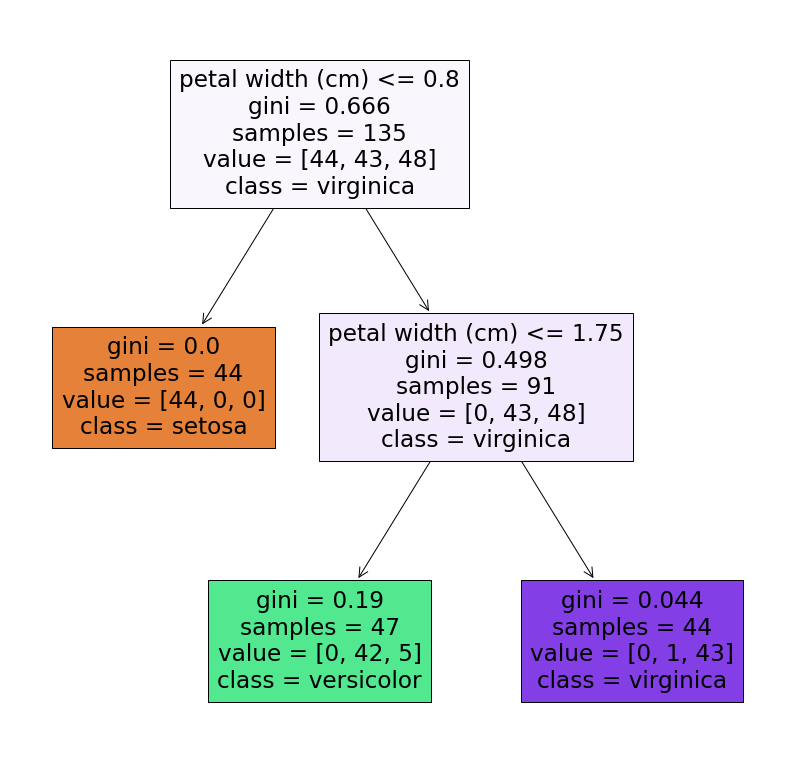

In [72]:
# from sklearn.tree import export_graphviz
# google : export_graphviz
# export_graphviz(clf)

# plot_tree 比 export_graphviz 更好用
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 14))
plot_tree(clf, 
          feature_names=iris['feature_names'], 
          class_names=iris['target_names'], 
          filled=True)



target: 是否是工程師

input: 眼鏡與否 / 手部是否有長繭
output: 工程師 / 非工程師

(工程師50:非工程師50)  為劃分前 - 信心程度(猜對機率)50%
* 以眼鏡劃分 - 信心度 50％ -> 廢
* 以長繭劃分 - 信心度 100% -> 強
* ---> 以長繭 劃分才有用

猜錯機率怎麼衡量？
(猜錯)min  8/10( 1 - 8/10) + 2/10(1 - 2/10)
=> Gini係數
公式 sigma Pi(1 - Pi)

gini係數＝0 (代表絕對平等, 就是無法再分類的意思)

Entropy亂度 -> 也是猜錯機率

統計 過於少數的樣本 應該視而不見 不尊重極少數 避免影響模型
-> 擬合
* 欠擬合 -> 剛剛好 -> 過擬合(學習過於稀少的例子) -[x]
  檢查過擬合

In [73]:
# metrics 矩陣 度量標準
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

1.0